In [1]:
#load libraries
from matplotlib import pyplot as plt 
import numpy as np

# Exercise 3.6. 
Replot Figure 3.3 for a laser beam incidence angle of 30° instead of
20°. Does maximum resonance absorption for 30° incidence angle occur at larger
or smaller dimensionless density-gradient scale length? By how much?

Text(4.5, 0.1, '$\\Delta k_0L=$8.59')

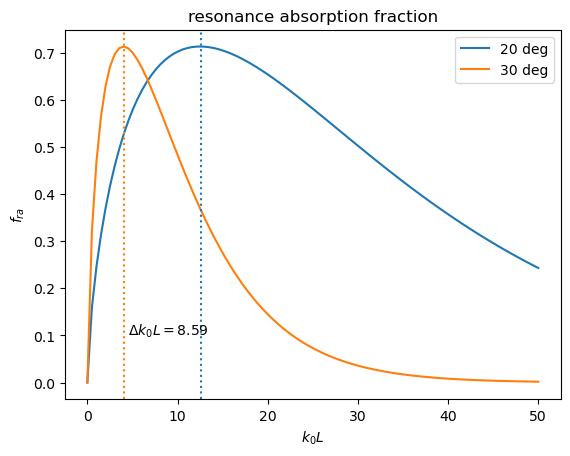

In [34]:
def fra(x,theta_deg):
    theta=theta_deg*np.pi/180
    tau=(x)**(1/3)*np.sin(theta)
    phi=2.1*tau*np.exp(-2/3*tau**3)
    return 1/2*phi**2

x=np.linspace(0,50,100) #define x-scale
plt.plot(x,fra(x,20),label='20 deg')
plt.plot(x,fra(x,30),label='30 deg')
plt.xlabel(r'$k_0L$')
plt.ylabel(r'$f_{ra}$')
plt.legend()
plt.title('resonance absorption fraction')

index_min_20 = np.argmax(fra(x,20)) #find 
index_min_30 = np.argmax(fra(x,30))

plt.axvline(x=x[index_min_20],linestyle='dotted')
plt.axvline(x=x[index_min_30],linestyle='dotted',color='tab:orange')

plt.text(s=r'$\Delta k_0L=$'+str(np.round(np.abs(x[index_min_30]-x[index_min_20]),2)),x=4.5,y=0.1)

For 30 deg incidence, the maximum resonance absorption occurs at smaller dimensionless density-gradient scale that at 20 degrees. Specifically, by about 8.6 units.

# Exercise 3.10. 
The index of refraction of the vacuum (free space) is n = 1; for a
dielectric it is n > 1; for collisionless plasma it is n < 1. Whereas a laser beam
obliquely entering a dielectric bends toward the normal to the surface, a laser beam
obliquely entering collisionless plasma bends away from the normal to the surface.
How might we use the refractive properties of plasma to design a “plasma mirror”
that will bend the beam back in the direction from whence it came?

We can make use of the right combination of the light frequency, incidence angle and polarization, and the plasma's density. Assuming that Snell's law holds for vacuum-plasma boundary, we have $n_{vacuum}\sin(\theta)=n_{plasma}\sin(\beta)$. For reflection, we require $\beta>\pi/2$. Since $n_{vacuum}=1$, the reflection just occurs when 

\begin{equation}
    n=n_{plasma}=\sqrt{1-\frac{\omega_p^2}{\omega^2}}=\sin(\theta)
\end{equation}

where $\omega$ is the light frequency, and $\omega_p=\sqrt{\frac{n_e e^2}{\epsilon_0 m_e}}$ is the density-dependent plasma frequency. 

This can be further rearranged to 
\begin{equation}
    \omega_p^2=\omega^2(1-\sin^2\theta)=\omega^2\cos^2(\theta)
\end{equation}

or 

\begin{equation}
    \omega_p=\omega \cos(\theta)
\end{equation}

This can be further reritten as $n_e=n_{cr}\cos^2(\theta)$, where $n_e$ is the electron density, and $n_{cr}$ the critical density. The light will reflect at densities lower than this.

# Exercise 4.10. 
Show that the equations of motion in cylindrical coordinates are
not invariant under linear transformation of the independent variables.

Here we use the three Navier-Stokes equations, as derived in class:

\begin{equation}
    \frac{\partial \rho}{\partial t}+\nabla \cdot(\rho \vec{u}) = 0
\end{equation}

\begin{equation}
    \frac{\partial (\rho\vec{u})}{\partial t}+\nabla \cdot(\rho \vec{u}\cdot \vec{u}) +\nabla p= 0
\end{equation}

\begin{equation}
    \frac{\partial \rho \epsilon}{\partial t}+\nabla \cdot(\rho \vec{u} \epsilon) + \nabla(p\vec{u})= 0
\end{equation}

these have very similar form. The del operator, in cartesian coordinates, can be expressed as

\begin{equation}
    \vec{\nabla}=\frac{\partial}{\partial x}+\frac{\partial}{\partial y}+\frac{\partial}{\partial z}
\end{equation}
This is invariant under the linear transformation $x\rightarrow x'=x_0+x$,$y\rightarrow y'=y_0+y$, $z\rightarrow z'=z_0+z$ since

\begin{equation}
    \vec{\nabla'}=\frac{\partial}{\partial (x_0+x)}+\frac{\partial}{\partial (y_0+y)}+\frac{\partial}{\partial (z_0+z)}=\frac{\partial}{\partial x'}+\frac{\partial}{\partial y'}+\frac{\partial}{\partial z'}
\end{equation}
has the identical form. In cylindrical coordinates, however, the divergence operation 

\begin{equation}
\nabla \cdot \vec{A}=\frac{1}{r}\frac{\partial}{\partial r}(rA_r)+\frac{1}{r}\frac{\partial}{\partial \theta}A_\theta+\frac{\partial}{\partial z}A_z
\end{equation}

is not invariant under the linear operations $r\rightarrow r'=r_0+r$, $\theta\rightarrow \theta'=\theta_0+\theta$, $z\rightarrow z'=z_0+z$ because the independent variables appear outside the derivatives.

# Exercise 4.18. 
Consider one-tenth-solid density Al plasma flowing past one-tenth-solid density Fe plasma at relative velocity 10^6 cm s–1. What is the classical Kelvin–Helmholtz growth rate of a 1-μm amplitude, 20-μm wavelength sinusoidal perturbation on the interface between these two plasmas? How much time passes before the perturbation growth starts to become non-linear?

An initial perturbation will grow in the direction perpendicular to the plane of unperturbed boundary as:

\begin{equation}
    \eta_z(t)\simeq \eta_0 e^{\gamma t}
\end{equation}
where
\begin{equation}
    \gamma=\frac{2\pi}{\lambda}\Delta u \frac{\sqrt{\rho_1 \rho_2}}{\rho_1+\rho_2}
\end{equation}

where $\lambda$ is the wavelength of the initial perturbation, $\Delta u$ is the relative velocity of the layers, and $\rho_i$ is the density of the respective layers. Here we have $\rho_{Al plasma}=\rho_1=271$ kg/m^3 and $\rho_{Fe plasma}=\rho_2=784$ kg/m^3

In [66]:
lambda_pert=20e-6 #20um perturbation wavelength
delta_u=1e4 #10^6 cm/s relative velocity
rho1=271 #density of Al plasma (kg/m^3)
rho2=784 #density of Fe plasma (kg/m^3)
eta_0=1e-6 #1um initial perturbation
gamma=2*np.pi/lambda_pert*delta_u*np.sqrt(rho1*rho2)/(rho1+rho2)
print('The growth rate is approximately {:.2g} s^-1'.format(gamma))

The growth rate is approximately 1.4e+09 s^-1


the above relations are only valid as long as $\eta<\lambda$, meaning that the perturbation amplitude is comparable in size to the perturbation wavelength. To get the overall time $\tau$ for which this linear approximation is valid, we can use

\begin{equation}
    \eta\simeq \lambda =\eta_0e^{\gamma \tau} \implies \tau\simeq\frac{1}{\gamma}\ln\left(\frac{\lambda}{\eta_0}\right)
\end{equation}

In [68]:
tau=1/gamma*np.log(lambda_pert/eta_0)
print('The time over which the perturbation growth remains approximately linear is {:.2g} s'.format(tau))

The time over which the perturbation growth remains approximately linear is 2.2e-09 s


# Exercise 5.6. 
Derive equation (5.39):
\begin{equation}
    P=P_0+\rho_0 u_0^2\sin^2(\theta)\left[1-\frac{\tan(\theta-\alpha)}{\tan(\theta)}\right]
\end{equation}

Assuming the mass arriving from the left with velocity $u$, we have the following 

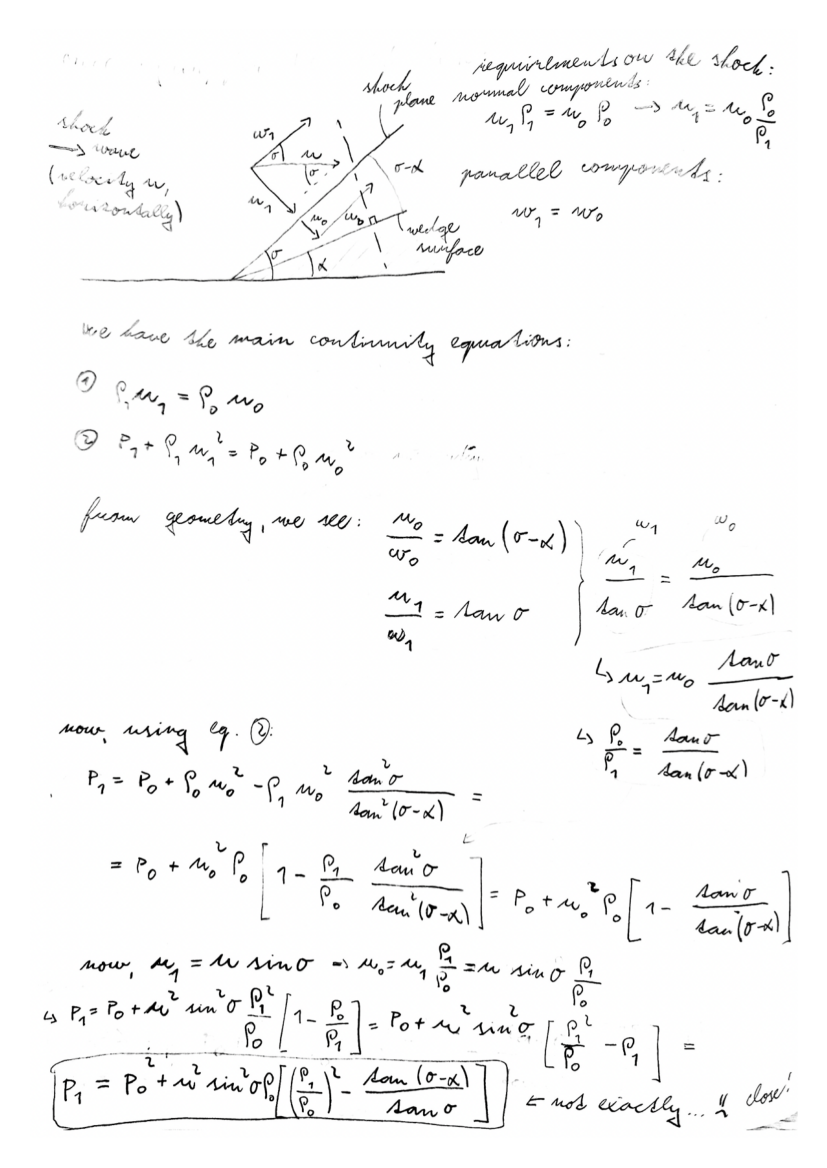

In [95]:
fig = plt.figure(dpi=300)
img = plt.imread("5p6.png")
plt.axis('off')
plt.imshow(img)

This is certainly close but a factor of $(\rho_1/\rho_2)$ in the square bracket is rendering my result different from the given solution.

# Exercise5.9. 
What is the change in entropy across a 1-Mbar shock in STP diatomic deuterium gas, including molecular vibrational modes in the adiabatic index?

We can use the equation 5.46 relating these quantities:
\begin{equation}
\Delta S=C_V \ln\left[\frac{P_1}{P_0}\left[\frac{(\gamma-1)(P_1/P_0)+(\gamma+1)}{(\gamma+1)(P_1/P_0)+(\gamma-1)}\right]^\gamma\right]
\end{equation}

here, since we are dealing with diatomic gas including molecular vibrational modes, we have $\gamma=C_P/C_V=9/7$. Assuming STP, $P_0=1$ bar, $P_1=1$ Mbar, and $C_P=5200$ J/[kg K] being the isobaric specific heat capacity of deuterium gas

In [94]:
gamma_ind=9/7 #diatomic gas with vibrational modes
P0=1 #1bar initial pressure (according to the STP formulation)
P1=1e6 #1Mbar of shock pressure
C_P=5200 #specific heat capacity of gas Deuterium [J/(kg K)] at constant pressure
#(https://en.wikipedia.org/wiki/Deuterium#:~:text=Solid%3A%202950%20J%2F(kg&text=K),Gas%3A%205200%20J%2F(kg&text=K))

C_V=C_P/gamma_ind #specific isochoric heat capacity
delta_S=C_V*np.log(P1/P0*(((gamma_ind-1)*P1/P0+(gamma_ind+1))/((gamma_ind+1)*P1/P0+(gamma_ind-1)))**gamma_ind)

print('The change in entropy is approximately {:.2e}'.format(delta_S))

The change in entropy is approximately 4.51e+04


# Exercise 6.2

Use Stirling’s formula to show that the free energy of a polyatomic gas – that is, a gas composed of several species of atoms with numbers of atoms $N_A$, $N_B$, ..., each species with a Maxwell–Boltzmann distribution – is

\begin{equation}
    F=-N_A k T\ln\left(\frac{Z_Ae}{N_A}\right)-N_B k T\ln\left(\frac{Z_Be}{N_B}\right)-\cdots
\end{equation}

when the total partiction function can be written 
\begin{equation}
    Z=\frac{Z_A^{N_A}}{N_A!}\cdot\frac{Z_B^{N_B}}{N_B!}\cdots
\end{equation}

Generally, the Free energy is
\begin{equation}
    F=-kT\ln(Z)=-kT\ln\left(\frac{Z_A^{N_A}}{N_A!}\cdot\frac{Z_B^{N_B}}{N_B!}\cdots\right)=-kT\left[\ln\left(\frac{Z_A^{N_A}}{N_A!}\right)+\ln\left(\frac{Z_B^{N_B}}{N_B!}\right)+\cdots\right]
\end{equation}

Using Stirling's formula:
\begin{equation}
    N!\simeq\left(\frac{N}{e}\right)^N
\end{equation}
we can rewrite this as

\begin{equation}
    F=-kT\left[\ln\left(\left(\frac{Z_Ae}{N_A}\right)^{N_A}\right)+\ln\left(\left(\frac{Z_Be}{N_B}\right)^{N_B}\right)+\cdots\right]=-kTN_A\ln\left(\frac{Z_Ae}{N_A}\right)-kTN_B\ln\left(\frac{Z_Be}{N_B}\right)-\cdots
\end{equation}
which gives the right result.

# Exercise 6.5
Make use of the thermodynamic relation
\begin{equation}
    \left(\frac{\partial P}{\partial T}\right)_V \left(\frac{\partial T}{\partial V}\right)_P \left(\frac{\partial V}{\partial P}\right)_T=-1
\end{equation}
to derive equation (6.49) relating the Gruneisen constant to other thermodynamic properties of the material.

We can take the relations 
\begin{equation}
    \alpha=\frac{1}{V_0}\left(\frac{\partial V}{\partial T}\right)_P
\end{equation}
for the coefficient of expansion at constant pressure,
\begin{equation}
    K_0=-\frac{1}{V_0}\left(\frac{\partial V}{\partial P}\right)_T
\end{equation}
for the compressibility, and
\begin{equation}
    C_V=\left(\frac{\partial \epsilon}{\partial T}\right)
\end{equation}
for the isochoric heat capacity.
Plugging these into the right-hand side of equation (6.49), which we want to demonstrate, we have

\begin{equation}
     \Gamma_0=\frac{\alpha}{\rho_0C_VK_0}=\frac{1}{\rho_0V_0}\left(\frac{\partial V}{\partial T}\right)_P \left(\frac{\partial T}{\partial \epsilon}\right)_V(-V_0)\left(\frac{\partial P}{\partial V}\right)_T
\end{equation}
using eq. 4.47:
\begin{equation}
     \Gamma(\rho)=\frac{1}{\rho}\frac{P_T}{\epsilon_T}\implies\epsilon=\frac{P}{\rho \Gamma}\implies \left(\frac{\partial T}{\partial \epsilon}\right)_V=\rho\Gamma\left(\frac{\partial T}{\partial P}\right)_V
\end{equation}
plugging into the equation above and collecting terms yields

\begin{equation}
    \Gamma_0=-\frac{1}{\rho_0} \rho_0 \Gamma_0\left(\frac{\partial T}{\partial P}\right)_V\left(\frac{\partial V}{\partial T}\right)_P\left(\frac{\partial P}{\partial V}\right)_T
\end{equation}
using the given triple-product relation, this simplifies to $\Gamma_0=\Gamma_0$, and equation 6.49 is thus justified.

# Exercise 8.7
Equation (8.82) may be written as
\begin{equation}
    \frac{dT_e}{dt}=-\frac{dT_i}{dt}=-\frac{1}{\tau_{eq}}(T_e-T_i)
\end{equation}
The temperature deviation is
\begin{equation}
    \xi(t)=\frac{T_e(t)}{T_b(t)}-1
\end{equation}
where the averagee temperature is 
\begin{equation}
    T_b=\frac{1}{2}(T_e+T_i)
\end{equation}

This means that
\begin{equation}
    \frac{d \xi}{dt}=\frac{dT_e}{dt}T_b-T_e\frac{dT_b}{dt}
\end{equation}
but
\begin{equation}
    \frac{dT_b}{dt}=\frac{1}{2}\left(\frac{dT_e}{dt}+\frac{dT_i}{dt}\right)=0
\end{equation}
and hence
\begin{equation}
    \frac{d\xi}{dt}=\frac{dT_e}{dt}T_b=-\frac{T_b}{\tau_{eq}}(T_e-T_i)=-\frac{2T_b^2}{\tau_{eq}}\left(\frac{T_e}{T_b}-1\right)=-\frac{2T_b^2}{\tau_{eq}}\xi
\end{equation}
it now needs to be demonstrated that 
\begin{equation}
    \frac{2T_b^2}{\tau_{eq}}=\frac{1}{\Gamma_{eq}}\frac{1}{\left[1+\xi\left(\frac{m_i-m_e}{m_i+m_e}\right)\right]^{\frac{3}{2}}}
\end{equation}

I've been struggling finding what $\Gamma_{eq}$ is meant to represent, however..

# Exercise 9.8
Show that the weighting function for the Rosseland mean opacity,
$\frac{\partial E_{\nu p}}{\partial T}$ , has a maximum at $h\nu = 4kT$ . Why are the higher-energy photons given
more weight in the averaging?

we have
\begin{equation}
    E_{\nu p}=\frac{8\pi h\nu^3}{c^3}\frac{1}{e^{\frac{h \nu}{kT}}-1}
\end{equation}
and hence
\begin{equation}
    f=\frac{\partial E_{\nu p}}{\partial T}=\frac{8\pi h \nu^3}{c^3}\frac{\partial }{\partial T}\left(e^\frac{\nu v}{kT}-1\right)^{-1}=\frac{8 \pi h^2}{kT^2c^3}\nu^4 e^{\frac{h\nu}{kT}}\left(e^{\frac{h \nu}{kT}}-1\right)^{-2}
\end{equation}

now, we can differentiate this function with respect to $\nu$ and set it to zero, to find the maximum

\begin{equation}
    \frac{\partial f}{\partial \nu}=0 = \frac{8 \pi h^2}{kT^2c^3}\left[ 4\nu^3e^{\frac{h \nu}{kT}}\left(e^{\frac{h \nu}{kT}}-1\right)^{-2}+\nu^4\left(e^{\frac{h \nu}{kT}}\frac{h}{kT}\left(e^{\frac{h \nu}{kT}}-1\right)^{-2}-\frac{2k\nu}{kT}e^{\frac{2h\nu}{kT}}\left(e^{\frac{h\nu}{kT}-1}\right)^{-3}\right)\right]
\end{equation}
after simplification, this leads to 
\begin{equation}
    \left(e^{\frac{h\nu}{kT}}-1\right)\left(4+\frac{h\nu}{kT}\right)-\frac{2h\nu}{kT}e^{\frac{h\nu}{kT}}=0
\end{equation}
which can be simplified to 
\begin{equation}
    (e^x-1)(4+x)-2xe^x=0
\end{equation}
where $x=\frac{k\nu}{kT}$
Plugging this to Wolfram Alpha solver, we get $x\simeq3.83$

and it can be said that $h\nu\simeq 4kT$ roughly solves the equation and roughly gives the maximum of the Rosseland mean opacity relation.

# Exercise 9.10
Show that, if we ignore the radiation pressure terms in equation
(9.95), the temperature in the shock transition region has a maximum at a compression factor η = 2.

The equation 
\begin{equation}
    R\rho_0\eta T+\frac{4\sigma}{3c}T^4=\left(R\rho_0\eta_1 T_1+\frac{4\sigma}{3c}T_1^4\right)\left(\frac{1-\frac{1}{\eta}}{1-\frac{1}{\eta_1}}\right)
\end{equation}
then simplifies to 
\begin{equation}
    T(\eta)=\frac{\eta_1 T_1}{\eta}\left(\frac{1-\frac{1}{\eta}}{1-\frac{1}{\eta_1}}\right)
\end{equation}
when the radiation pressure terms (involving $T^4$) are neglected. We can then differentiate as 
\begin{equation}
    \frac{\partial T(\eta_{max})}{\partial \eta}=0=\eta_1 T_1\left[-\eta^{-2}\left(\frac{1-\frac{1}{\eta}}{1-\frac{1}{\eta_1}}\right)+\eta^{-1}\left(\frac{\eta^{-2}}{1-\frac{1}{\eta_1}}\right)\right]=\frac{1}{\eta^3}\left(\frac{1}{1-\frac{1}{\eta_1}}\right)-\frac{1}{\eta^2}\left(\frac{1}{1-\frac{1}{\eta_1}}\right)\left(1-\frac{1}{\eta}\right)
\end{equation}
which leads to the cancellation of terms including $T_1$ and $\eta_1$. Ignoring the trivial solution, we get
\begin{equation}
    \frac{1}{\eta}-\left(1-\frac{1}{\eta}\right)=0  \implies \eta_{max}=2
\end{equation}

# Exercise 10.2. 
Can a spherically symmetric magnetic field exist which satisfies
Maxwell’s equations? If so, describe how it enters into the fluid dynamic equations.
Why is there no radial magnetic field component in a cylindrically symmetric
geometry?

I believe that such magnetic field cannot exist. There cannot be any radial component of such field since then the divergence would be nonzero, which directly violates one of the Maxwell's equations. Then, the field could be represented as being contained on a spherical surface. The magnetic field lines need to close on themselves, however. Spherical symmetry does not allow for such configuration since in that case, the magnetic field lines would need to be circular and equatorial; symmetry then enforces that all such field lines would cancel each other.

In cylindrical geometry, radial field cannot exist due to the zero-divergence requirement as well.

# Exercise 10.7:
Consider a thin conducting cylindrical shell of radius R carrying
a uniform current density in the axial direction. (a) Show that an approximate
equation of motion is
\begin{equation}
    \hat{m}\ddot{r}=-\frac{I^2(t)}{c^2r}
\end{equation}

for this problem, we can follow the analysis developed by the textbook for the case of a cylinder of uniform current density, modified for a hollow cylinder shell. We can use the result (eq.)

\begin{equation}
    \frac{d}{dt}\left[\hat{m}(r)\dot{r}\right]=-2\pi\frac{B^2}{8\pi}
\end{equation}
in this case, however, the "snowplow" model is somewhat modified since all mass is confined to the thin cylindrical shell at all times of the implosion, giving $\hat{m}(r)=\pi\rho_0 R^2$. Substituting equation 10.62
\begin{equation}
    B(r)=\frac{2Ir}{cR^2}
\end{equation}
valid for the cylindrical geometry as well (not inside the cylinder though!), we get
\begin{equation}
    \hat{m}\ddot{r}=-2\pi r\frac{4I^2}{c^2r^2}\frac{1}{8\pi}=-\frac{I^2}{c^2r}
\end{equation}
which gives the correct result. Here, $r$ can be substituted with $R$ since we are dealing with a hollow cylinder; it is better to refer to $R$ as the initial radius.

now, we want to find $\dot{r}^2$, assuming that the current is constant in time $I(t)=I_{max}$. to do this, we need to integrate the above equation. A little trick can be used here:

\begin{equation}
    \frac{d}{dt}(\dot{r}^2)=2\dot{r}\ddot{r}
\end{equation}
which means that we can write
\begin{equation}
    \frac{d}{dt}(\dot{r}^2)=-\frac{2I^2_{max}}{\hat{m}c^2}\frac{\dot{r}}{r}
\end{equation}
this expression can be integrated to give
\begin{equation}
    \dot{r}^2=-\frac{2I_{max}^2}{\hat{m}c^2}\int_0^t\frac{\dot{r}}{r}
\end{equation}

Here we can use the "chain rule for integrals" which can be stated as
\begin{equation}
    \int_a^bf(\phi(t)\phi'(t))dt=\int_{\phi(a)}^{\phi(b)}f(x)dx
\end{equation}
In this case, this means
\begin{equation}
    \int_0^tf(r(t))\dot{r}(t)=\int_{r(0)}^{r(t)}f(x)dx
\end{equation}
where $f(x)=1/x$

This means
\begin{equation}
    \int_0^tr^{-1}\dot{r}=\int_{r(0)}^{r(t)}\frac{1}{x}dx=\left[\ln x\right]_{r(0)}^{r(t)}=\ln\left(\frac{r(t)}{r(0)}\right)=\ln\left(\frac{r(t)}{R}\right)
\end{equation}
and hence
\begin{equation}
    \dot{r}^2=\frac{2I_{max}^2}{\hat{m}c^2}\ln\left(\frac{R}{r(t)}\right)=\frac{2R^2}{\tau_A^2}\ln\left(\frac{R}{r(t)}\right)
\end{equation}
where $\tau_A=c\sqrt{\hat{m}}R/I_{max}$ is the Alfven transit time. This gives the correct result for part b).

Now onto the implosion time:

The radial velocity velocity of the imploding cylinder $\dot{r}$ was calculated in the previous step. It can be used to find the implosion time $t_{imp}$ as
\begin{equation}
    t_{imp}=\int_{T_0}^{T_1} dt=\int_{T_0}^{T_1}\frac{dr}{\dot{r}(t)}=\frac{\tau_A}{\sqrt{2}R}\int_{T_0}^{T_1}\left(\ln\left(\frac{R}{r(t)}\right)\right)^{-\frac{1}{2}}dr
\end{equation}
since $dt=dr/\dot{r}(t)$

we want to express the final result in the form of an error function $erf(z)$ defined as

\begin{equation}
    erf(z)=\frac{2}{\sqrt{\pi}}\int_0^ze^{-t'^2}dt'
\end{equation}

to achieve that, we can make a u-substitution with 
\begin{equation}
    u=\left(ln\left(\frac{R}{r(t)}\right)\right)^{-\frac{1}{2}}\implies r(t)=Re^{-u^2} \implies dr=Re^{-u^2}(-2u)du
\end{equation}
plugging this into the integral above, we get
\begin{equation}
    t_{imp}=\frac{\tau_A}{\sqrt{2}R}\int_{T_0}^{T_1}\frac{1}{u}Re^{-u^2}(-2u)du=\frac{-2\tau_A}{\sqrt{2}}\int_{T_0}^{T_1} e^{-u^2}du
\end{equation}

now we need to investigate the integration bounds $T_0$ and $T_1$. These correspond to the moments when the implosion starts, and when it is considered finished, respectively. Bound $T_0$ corresponds to $r(t)=Re^{-u^2}=R \implies u=0$. We wish to take the bound $T_1=\ln\left(\frac{R}{r(t)}\right)$. This then means

\begin{equation}
    r(t)=Re^{-\left(\ln\left(\frac{R}{r(t)}\right)\right)}\implies \ln\left(\frac{R}{r(t)}\right)\left[\ln\left(\frac{R}{r(t)}\right)-1\right]=0
\end{equation}

\begin{equation}
    r(T_1)=\frac{R}{e}
\end{equation}
solves this equation. It is reasonable to take characteristic implosion time as the time it takes the radius of the imploding cylinder become $1/e$ of its original size. The minus sign can be safely ignored since the above equation describes an expansion rather than implosion; the characteristic time of this reversed process is, however, identical, and an absolute value can be taken. Finally, the result can be written in terms of the error function as
\begin{equation}
    t_{imp}=\tau_A\sqrt{\frac{\pi}{2}}erf\left[\ln\left(\frac{R}{r(t)}\right)\right]
\end{equation}